In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("Algerain_forest_fires_cleaned_dataset.csv")

In [30]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [31]:
df = df.drop(['day', 'month', 'year'], axis = 1)

In [32]:
x = df.drop('FWI',axis = 1)
y = df['FWI']


In [33]:
## Train test split

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [34]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [35]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### Multicoliearity
if two features are highly correlted , then we can drop one of them

In [36]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
## Threshold Domain expertise

corr_features = correlation(x_train, 0.85)

In [38]:
corr_features

{'BUI', 'DC'}

In [39]:
x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'x_train after scaling')

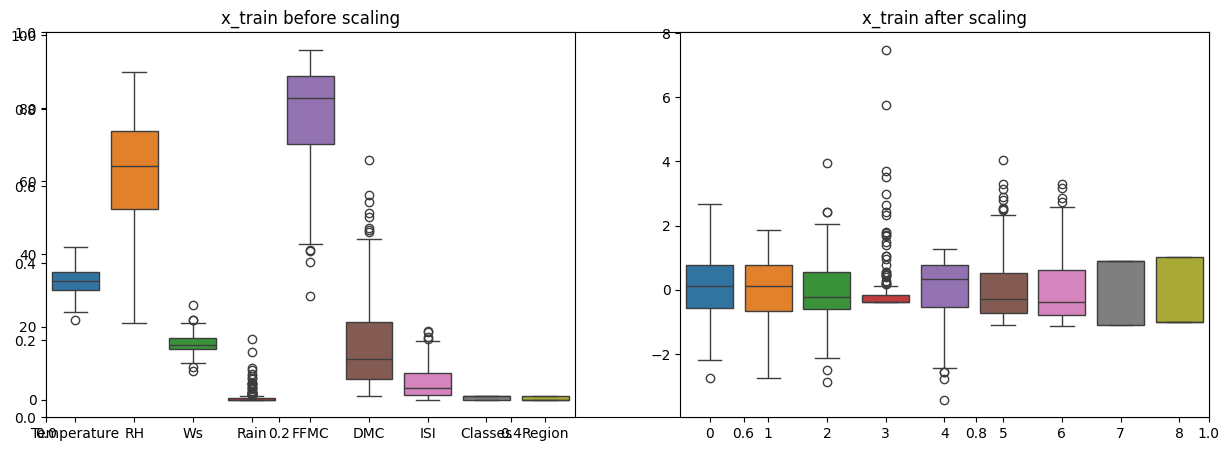

In [42]:
plt.subplots(figsize= (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('x_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train after scaling')

Lasso Regression

Mean absolute error 1.133175994914409
r2 score  0.9492020263112388


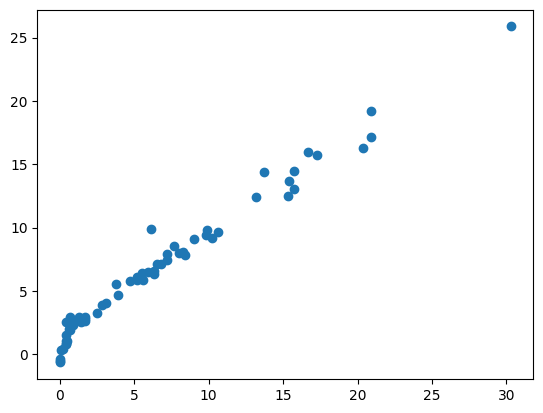

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("r2 score ", score)
plt.scatter(y_test, y_pred)

Cross Validation

In [44]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


Mean absolute error  0.619970115826343
R2 score 0.9820946715928275


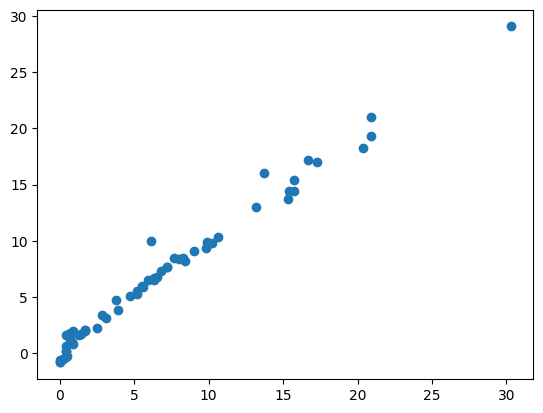

In [46]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error ",mae)
print("R2 score", score)